In [9]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'   

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
import seaborn as sns

In [11]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [12]:
df_DA_US = df_DA_US.explode('job_skills')

In [13]:
df_DA_US_group =df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [14]:
df_DA_top_pay = df_DA_US_group.sort_values(by='median' ,ascending=False).head(10)

In [15]:
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by= 'median', ascending=False)

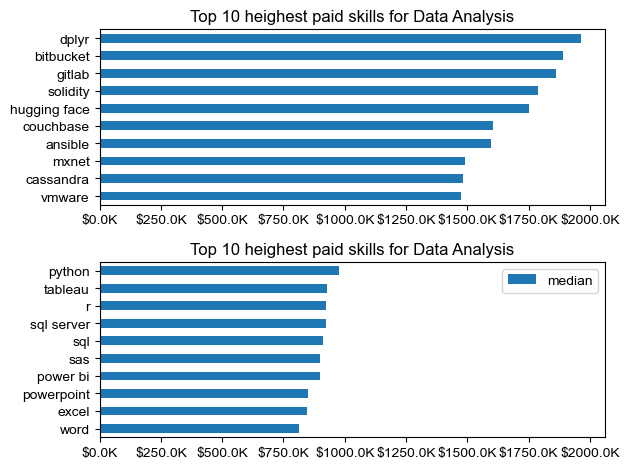

In [16]:
fig, ax = plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 heighest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${x/100}K'))
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 heighest paid skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${x/100}K'))
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()
plt.legend()
plt.show()

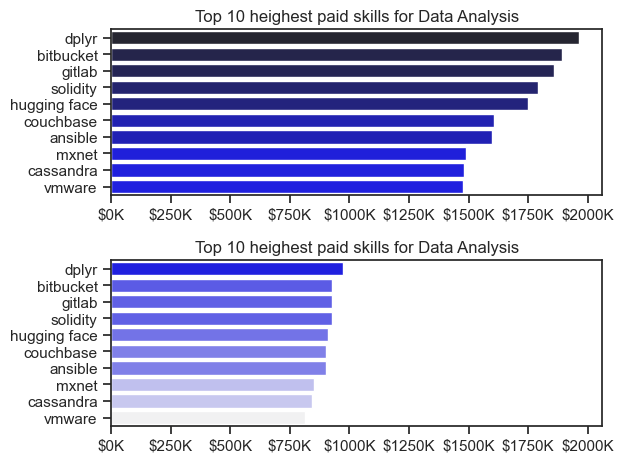

In [27]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0] ,hue='median', palette='dark:blue_r')
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 heighest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_skills, x='median', y=df_DA_top_pay.index, ax=ax[1] ,hue='median', palette='light:blue')
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 heighest paid skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
fig.tight_layout()
plt.show()

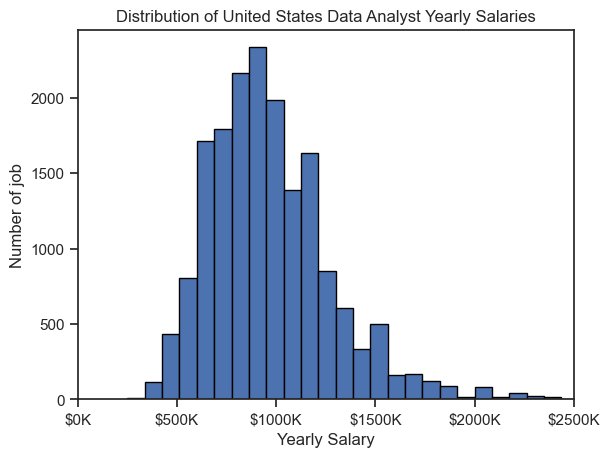

In [34]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins =40, edgecolor='black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of job')
plt.show()


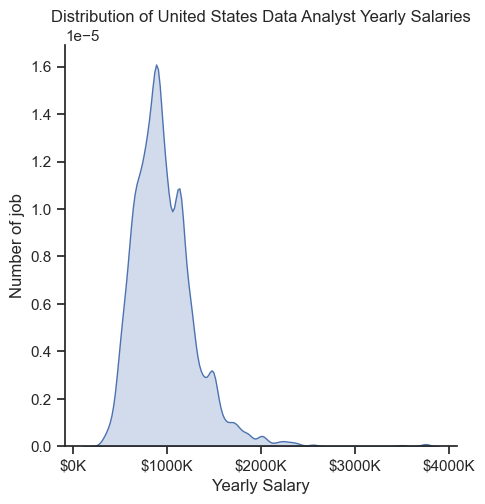

In [39]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of job')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
plt.show()

In [40]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')]

df_US = df_US.dropna(subset='salary_year_avg')

In [41]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

data_jobs = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'].dropna() for job_title in job_titles]

C:\Users\Windows-11\AppData\Local\Temp\ipykernel_16436\2672812430.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_jobs, labels= job_titles, vert=False)


(0.0, 600000.0)

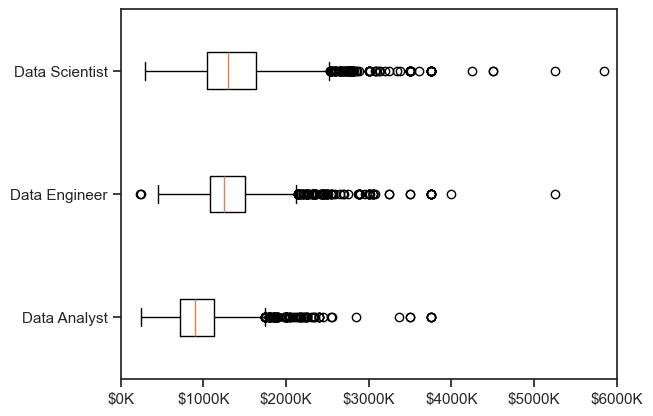

In [42]:
plt.boxplot(data_jobs, labels= job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
plt.xlim(0,600000)

(0.0, 600000.0)

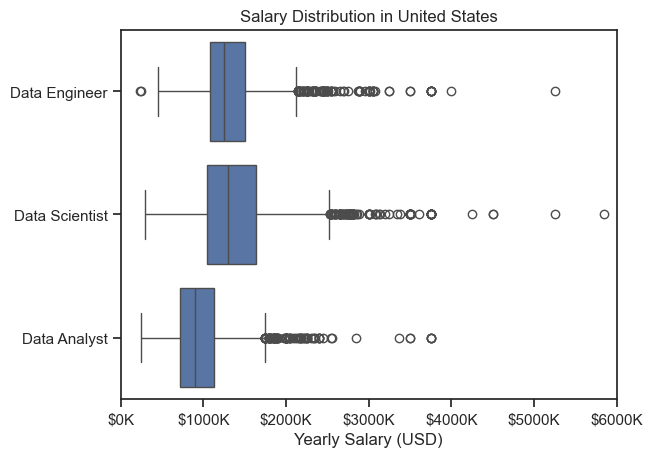

In [45]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in United States')
plt.xlabel("Yearly Salary (USD)")
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))
plt.xlim(0,600000)